In [1]:
import pandas as pd
import numpy as np

##### 数据查看

In [2]:
# 附件一至附件四
data1 = pd.read_excel("CUMCM2023Problems/C题/6 个蔬菜品类的商品信息.xlsx")
data2 = pd.read_excel("CUMCM2023Problems/C题/销售流水明细数据.xlsx")
# data2.sort_values('销售日期')
data3 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的批发价格.xlsx")
# data3.sort_values('日期')
data4 = pd.read_excel("CUMCM2023Problems/C题/蔬菜类商品的近期损耗率.xlsx")

In [18]:
# 附件二切分demo，便于编程，最终应删去
data2_replace = data2.sample(100000)

# 合并表一与表二
datas_replace = pd.merge(data2_replace, data1, how='left', on='单品编码')
datas = pd.merge(data2, data1, how='left', on='单品编码')

# datas=[data1,data2,data3,data4]

##### 清洗数据

In [4]:
# for i in datas:
#     for j in i.columns:
#         print(i[j].value_counts())

### 问题一

In [15]:
# 获得每日销售总量
Totaldailysales = pd.DataFrame(
    columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
Totaldailysales.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
for i in datas['销售日期'].value_counts().keys():
    daydata = datas[datas['销售日期'] == i]
    for j in daydata['单品编码'].value_counts().keys():
        daydata1 = daydata[daydata['单品编码'] == j]
        Totaldailysales.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
            ['单品名称', '分类编码', '分类名称']].tolist()
    for j in daydata['分类编码'].value_counts().keys():
        daydata2 = daydata[daydata['分类编码'] == j]
        Totaldailysales.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
            ['分类编码', '分类名称']].tolist()
# 获得每日销售总量
Totaldailysales_replace = pd.DataFrame(
    columns=['销售日期', '销量(千克)', '单品编码/分类编码', '单品名称', '分类编码', '分类名称'])
Totaldailysales_replace.set_index(['销售日期', '单品编码/分类编码'], drop=True, inplace=True)
for i in datas_replace['销售日期'].value_counts().keys():
    daydata = datas_replace[datas['销售日期'] == i]
    for j in daydata['单品编码'].value_counts().keys():
        daydata1 = daydata[daydata['单品编码'] == j]
        Totaldailysales_replace.loc[(i, j), :] = [sum(daydata1['销量(千克)'])] + daydata1.iloc[0][
            ['单品名称', '分类编码', '分类名称']].tolist()
    for j in daydata['分类编码'].value_counts().keys():
        daydata2 = daydata[daydata['分类编码'] == j]
        Totaldailysales_replace.loc[(i, j), :] = [sum(daydata2['销量(千克)'])] + [None] + daydata2.iloc[0][
            ['分类编码', '分类名称']].tolist()


C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\3437826010.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daydata = datas_replace[datas['销售日期'] == i]
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\343782

###### 可视化,横坐标为每一天，纵坐标为当天的销售总额（kg)，这里的是分类（6类）绘图，将第7行改为y1即为对每一个单品绘图（太多了点）

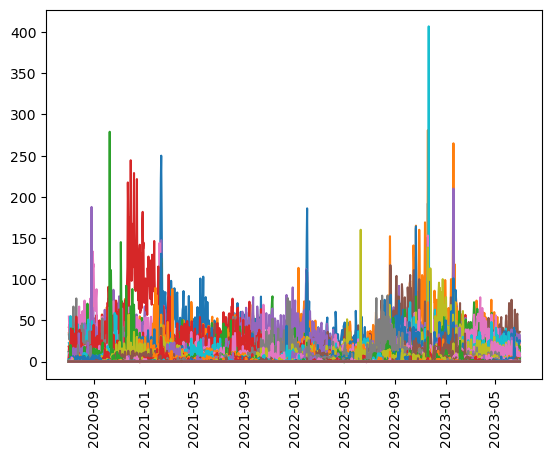

In [41]:
import matplotlib.pyplot as plt

x = datas['销售日期'].value_counts().keys().sort_values()
y1 = datas['单品编码'].value_counts().keys()
y2 = datas['分类编码'].value_counts().keys()

for i in y1:
    # for i in y2:
    y = []
    for j in x:
        try:
            y.append(Totaldailysales.loc[(j, i)]['销量(千克)'])
        except:
            y.append(0)
    plt.plot(x, y)
plt.xticks(rotation=90)
plt.show()

###### y1出现尖峰，检查发现为2022-11-21日，2022-11-21,102900005118831,407.0,娃娃菜,1011010101,花叶类，买了407kg娃娃菜。是否需要剔除？

###### y2出现尖峰，检查发现为2022-11-19日，不知道为什么这一天的流水多了很多，其他时候是1000单上下，这一天到了3000单，但是没有发现哪一单有问题的，应该单纯成交量大

###### 可视化,关系矩阵热力图，将第4行改为y1即为对每一个单品绘图（基本没法看）

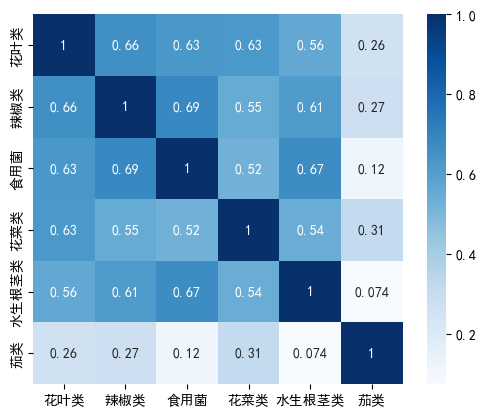

In [74]:
import seaborn as sns

Correlationmatrix = pd.DataFrame()
# for i in y1:
for i in y2:
    y = []
    # name = data1[data1['单品编码'] == i]['单品名称'].iloc[0]
    name = data1[data1['分类编码'] == i]['分类名称'].iloc[0]    
    for j in x:
        try:
            y.append(Totaldailysales.loc[(j, i)]['销量(千克)'])
        except:
            y.append(0)
    Correlationmatrix[name] = y

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
sns.heatmap(Correlationmatrix.corr(), annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

In [82]:
import seaborn as sns

Correlationmatrix = pd.DataFrame()
for i in y1:
    y = []
    name = data1[data1['单品编码'] == i]['单品名称'].iloc[0]
    for j in x:
        try:
            y.append(Totaldailysales.loc[(j, i)]['销量(千克)'])
        except:
            y.append(0)
    Correlationmatrix[name] = y

a=Correlationmatrix.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_29652\1672074254.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Correlationmatrix[name] = y
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\1672074254.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Correlationmatrix[name] = y
C:\Users\dell\AppData\Local\Temp\ipykernel_29652\1672074254.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

In [85]:
a

,芜湖青椒(1),西兰花,西峡香菇(1),云南生菜,净藕(1),紫茄子(2),泡泡椒(精品),云南油麦菜,螺丝椒,上海青,...,猴头菇,洪山菜薹珍品手提袋,紫白菜(2),绣球菌(袋),甘蓝叶,虫草花(盒)(2),水果辣椒(橙色),金针菇(份),芥兰,活体银耳
芜湖青椒(1),1.000000,0.326859,0.144207,0.062298,0.320151,0.418825,-0.459663,0.093241,0.203924,0.045007,...,-0.017314,-0.000025,0.005065,0.021530,0.002370,-0.032168,-0.014026,0.006069,0.019747,0.021714
西兰花,0.326859,1.000000,0.327436,0.211032,0.483608,0.201340,0.166557,0.159733,0.154558,0.094436,...,-0.030592,-0.019780,-0.035527,-0.007599,-0.025913,0.045200,0.038853,0.039060,0.002320,-0.020992
西峡香菇(1),0.144207,0.327436,1.000000,0.186678,0.540413,0.044238,0.172652,0.191655,0.040864,0.074509,...,-0.031578,0.002242,-0.038762,-0.040784,-0.027954,-0.028198,0.005698,-0.028392,-0.010278,-0.004923
云南生菜,0.062298,0.211032,0.186678,1.000000,0.110475,0.240939,0.245304,0.593232,0.360283,0.534431,...,-0.008579,-0.031565,-0.013734,0.011789,0.025637,-0.001791,0.018391,0.009585,0.062512,0.008158
净藕(1),0.320151,0.483608,0.540413,0.110475,1.000000,0.056454,0.139931,0.124533,-0.128514,0.007949,...,-0.027202,-0.008814,-0.037416,-0.040014,0.001763,0.012018,-0.036979,0.052371,-0.015601,-0.027650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
虫草花(盒)(2),-0.032168,0.045200,-0.028198,-0.001791,0.012018,0.018479,0.087872,0.030145,0.003014,0.001371,...,-0.001599,-0.000923,-0.001241,-0.001305,-0.000923,1.000000,-0.000923,-0.000923,-0.000923,-0.000923
水果辣椒(橙色),-0.014026,0.038853,0.005698,0.018391,-0.036979,0.086703,-0.013850,0.024188,0.038179,0.031094,...,-0.001599,-0.000923,-0.001241,-0.001305,-0.000923,-0.000923,1.000000,-0.000923,-0.000923,-0.000923
金针菇(份),0.006069,0.039060,-0.028392,0.009585,0.052371,-0.040804,-0.013850,0.028861,-0.028965,-0.029743,...,-0.001599,-0.000923,-0.001241,-0.001305,-0.000923,-0.000923,-0.000923,1.000000,-0.000923,-0.000923
芥兰,0.019747,0.002320,-0.010278,0.062512,-0.015601,0.002482,-0.013850,-0.000503,-0.018507,0.021795,...,-0.001599,-0.000923,-0.001241,-0.001305,-0.000923,-0.000923,-0.000923,-0.000923,1.000000,-0.000923
